In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [56]:
df = pd.read_csv("data/medical_insurance_scaled.csv", sep=",")
df.head()

,age,children,bmi,sex,smoker,charges,northeast,northwest,southeast,southwest
0,-1.440016,-0.909856,-0.453197,0,1,16884.92400,0.0,0.0,0.0,1.0
1,-1.511283,-0.080117,0.509049,1,0,1725.55230,0.0,0.0,1.0,0.0
2,-0.798610,1.579361,0.382826,1,0,4449.46200,0.0,0.0,1.0,0.0
3,-0.442273,-0.909856,-1.304793,1,0,21984.47061,0.0,1.0,0.0,0.0
4,-0.513541,-0.909856,-0.292550,1,0,3866.85520,0.0,1.0,0.0,0.0


# Regression 1, 2 variables

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("data/medical_insurance_scaled.csv", sep=",")

X = df.drop('charges', axis=1)  # Features
y = df['charges']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 49333501.87467351
R-squared Score: 0.7384235179395936


/home/g/anaconda3/envs/sy09/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


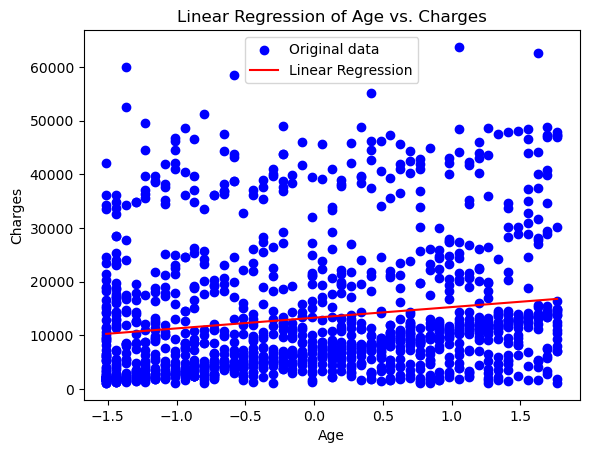

In [58]:
import matplotlib.pyplot as plt

# Choose two features to visualize: age and charges
X_plot = df[['age']]
y_plot = df['charges']

# Create a linear regression model using the chosen features
model_plot = LinearRegression()
model_plot.fit(X_plot, y_plot)

# Create a scatter plot of the chosen features
plt.scatter(X_plot, y_plot, color='blue', label='Original data')

# Create a range of values for the x-axis
x_range = np.linspace(X_plot.min(), X_plot.max(), 100)

# Predict the y values for the x_range using the linear regression model
y_range = model_plot.predict(x_range.reshape(-1, 1))

# Plot the linear regression line
plt.plot(x_range, y_range, color='red', label='Linear Regression')

# Add title and labels to the plot
plt.title('Linear Regression of Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Show the legend
plt.legend()

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

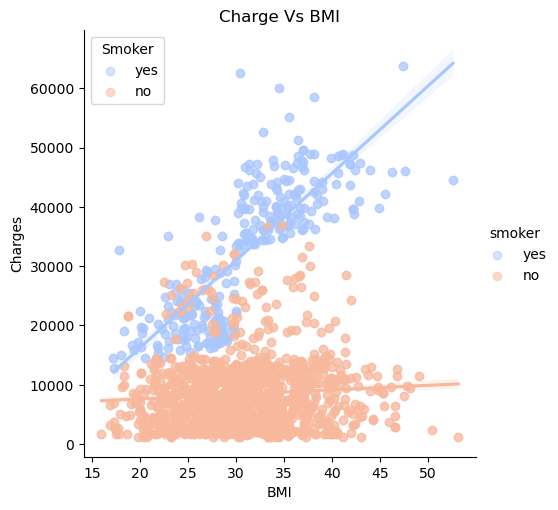

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/medical_insurance.csv", sep=",")

plt.figure(figsize=(12, 6))
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm', fit_reg=True, scatter_kws={'alpha': 0.5})
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Charge Vs BMI')
plt.legend(title='Smoker')
plt.show()

# Regression "age", "bmi", "smoker" test

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df = pd.read_csv("data/medical_insurance.csv", sep=",")
df = df.drop_duplicates()
le_smoker = LabelEncoder()
df["smoker"] = le_smoker.fit_transform(df["smoker"])

le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])

oh_region = OneHotEncoder()
encoded_region = oh_region.fit_transform(df[["region"]])
encoded_region = pd.DataFrame(encoded_region.toarray(), columns=["northeast", "northwest", "southeast", "southwest"])
df.drop(columns=["region"], inplace=True)
df = pd.merge(df, encoded_region, left_index=True, right_index=True)



In [61]:
# regression charge = f(age,bmi, smoker)

X = df[["age", "bmi", "smoker"]]
y = df["charges"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 32027567.655877862
R-squared Score: 0.8197894299293975


Model Coefficients: [  260.45329346   280.9269822  23146.94254861] -10426.937876765536


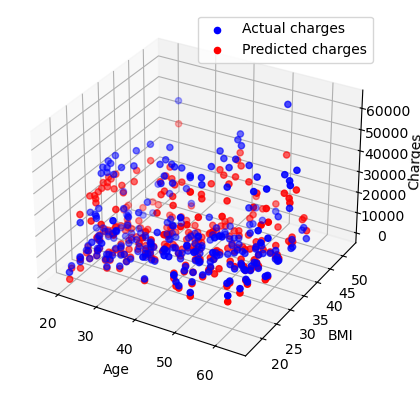

In [62]:
# equation of the model
print("Model Coefficients:", model.coef_, model.intercept_)

#plot equation of the model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test["age"], X_test["bmi"], y_test, color='blue', label='Actual charges')
ax.scatter(X_test["age"], X_test["bmi"], y_pred, color='red', label='Predicted charges')
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
plt.legend()
plt.show()


In [63]:

#plot model equation c = fc(age,bmi,smoker)
X = df[["age", "bmi", "smoker"]]
y = df["charges"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
#model equation
print(f"equation of the model: charges = {model.intercept_} + {model.coef_[0]}*age + {model.coef_[1]}*bmi + {model.coef_[2]}*smoker")

Mean Squared Error: 32027567.655877862
R-squared Score: 0.8197894299293975
equation of the model: charges = -10426.937876765536 + 260.4532934576568*age + 280.92698220195274*bmi + 23146.942548605162*smoker


# Choix nombre de variables pour la regression:

In [64]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


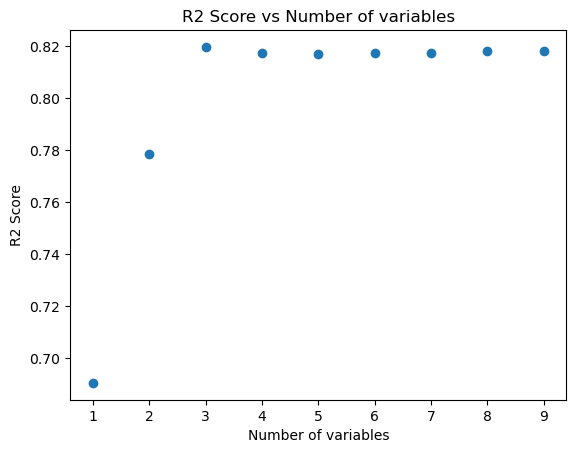

Best R2 Score: 0.8197894299293976
Number of variables: 3
Variables: Index(['age', 'bmi', 'smoker'], dtype='object')


In [65]:
# trouver les meilleurs varible pour la regression:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df.drop(columns=["charges"])
y = df["charges"]

r2_scores = []
support = []
for i in range(1, len(X.columns)+1):
    selector = SelectKBest(score_func=f_regression, k=i)
    selector.fit(X, y)
    X_new = selector.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    support.append(selector.get_support())
    
# R2 en fonction du nombre de variables 
plt.scatter(range(1, len(X.columns)+1), r2_scores)
plt.xlabel("Number of variables")
plt.ylabel("R2 Score")
plt.title("R2 Score vs Number of variables")
plt.show()

print("Best R2 Score:", max(r2_scores))
print("Number of variables:", r2_scores.index(max(r2_scores))+1)
print("Variables:", X.columns[support[r2_scores.index(max(r2_scores))]])


on prend donc 3 variables qui sont : age', 'bmi', 'smoker'

on va representer un plot 4d

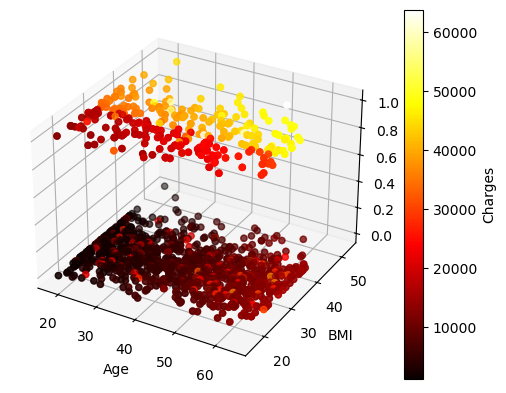

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = df.drop(columns=["charges"])
c = df["charges"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X["age"]
y = X["bmi"]
z = X["smoker"]

c = c

ax.scatter(x, y, z, c=c, cmap=plt.hot())
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Smoker')

#add color bar
plt.colorbar(ax.scatter(x, y, z, c=c, cmap=plt.hot()), label="Charges")
plt.show()




In [98]:
#Import modules
import plotly
import plotly.graph_objs as go

data = df

In [104]:
# scatter 3d
fig1 = go.Scatter3d(x=data['age'], y=data['bmi'], z=data['charges'], mode='markers', marker=dict(size=5, color=data['smoker'], colorscale= [[0, 'rgb(0, 0, 255)'], [1, 'rgb(255, 0, 0)']], opacity=0.8, colorbar_title='Smoker'))
mylayout = go.Layout(scene=dict(xaxis=dict(title="Age"), yaxis=dict(title="BMI"), zaxis=dict(title="Charges")), title='Age vs BMI vs Charges')
fig = go.Figure(data=[fig1], layout=mylayout)

plotly.offline.plot(fig, filename='plotly/charge_fct_age_bmi_smoker.html')

'plotly/charge_fct_age_bmi_smoker.html'

In [101]:
# same with regression plane
X = df[["age", "bmi", "smoker"]]
y = df["charges"]
model = LinearRegression()
model.fit(X, y)
print(f"equation of the model: charges = {model.intercept_} + {model.coef_[0]}*age + {model.coef_[1]}*bmi + {model.coef_[2]}*smoker")


#2 plot 1 pour smoker 1 pour non smoker
x_smoker = X[X["smoker"] == 1]
y_smoker = y[y.index.isin(x_smoker.index)]
x_non_smoker = X[X["smoker"] == 0]
y_non_smoker = y[y.index.isin(x_non_smoker.index)]

fig3 = go.Scatter3d(x=x_smoker['age'], y=x_smoker['bmi'], z=y_smoker, mode='markers', marker=dict(size=5, color='red'), name='Smoker')
fig4 = go.Scatter3d(x=x_non_smoker['age'], y=x_non_smoker['bmi'], z=y_non_smoker, mode='markers', marker=dict(size=5, color='blue'), name='Non-Smoker')

x = np.linspace(X["age"].min() -1 , X["age"].max() +1, 100)
y = np.linspace(X["bmi"].min() -1, X["bmi"].max() +1 , 100)
x, y = np.meshgrid(x, y)

z = model.coef_[0] * x + model.coef_[1] * y + model.intercept_
fig5 = go.Surface(x=x, y=y, z=z, colorscale='Viridis', opacity=0.5, name='Regression Plane non Smoker')

z = model.coef_[0] * x + model.coef_[1] * y + model.intercept_ + model.coef_[2]
fig6 = go.Surface(x=x, y=y, z=z, colorscale='Viridis', opacity=0.5, name='Regression Plane Smoker')

mylayout = go.Layout(scene=dict(xaxis=dict(title="Age"), yaxis=dict(title="BMI"), zaxis=dict(title="Charges")), title='Age vs BMI vs Charges')
fig = go.Figure(data=[fig3, fig4, fig5, fig6], layout=mylayout)


plotly.offline.plot(fig, filename='plotly/surface_charge_fct_age_bmi_smoker.html')





equation of the model: charges = -11686.382859836931 + 260.15822816775045*age + 322.1871821973936*bmi + 23853.005608758605*smoker


'plotly/surface_charge_fct_age_bmi_smoker.html'

In [102]:
#open a plotly
import webbrowser
webbrowser.open('plotly/surface_charge_fct_age_bmi_smoker.html')
webbrowser.open('plotly/charge_fct_age_bmi_smoker.html')

True

# Test inférence

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv("data/medical_insurance.csv", sep=",")
df = df.drop_duplicates()

le_smoker = LabelEncoder()
df["smoker"] = le_smoker.fit_transform(df["smoker"])

le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])

oh_region = OneHotEncoder()
encoded_region = oh_region.fit_transform(df[["region"]])
encoded_region = pd.DataFrame(encoded_region.toarray(), columns=["northeast", "northwest", "southeast", "southwest"])
df.drop(columns=["region"], inplace=True)
df = pd.merge(df, encoded_region, left_index=True, right_index=True)

scaler = StandardScaler()
# On ne garde que age, children, bmi
df_quant = df[["age", "bmi"]]
df_non_quant = df.drop(columns=["age", "bmi"])
scaled_data = scaler.fit_transform(df_quant)


scaled_data = pd.DataFrame(scaled_data, columns=["age", "bmi"])
scaled_data = pd.merge(scaled_data, df_non_quant, left_index=True, right_index=True)
scaled_data.head()

,age,bmi,sex,children,smoker,charges,northeast,northwest,southeast,southwest
0,-1.440016,-0.453197,0,0,1,16884.92400,0.0,0.0,0.0,1.0
1,-1.511283,0.509049,1,1,0,1725.55230,0.0,0.0,1.0,0.0
2,-0.798610,0.382826,1,3,0,4449.46200,0.0,0.0,1.0,0.0
3,-0.442273,-1.304793,1,0,0,21984.47061,0.0,1.0,0.0,0.0
4,-0.513541,-0.292550,1,0,0,3866.85520,0.0,1.0,0.0,0.0


In [69]:
df_smoker = scaled_data[scaled_data['smoker'] == 1]
df_smoker = df_smoker.drop('smoker', axis=1)

df_non_smoker = scaled_data[scaled_data['smoker'] == 0]
df_non_smoker = df_non_smoker.drop('smoker', axis=1)


In [70]:
# Linear Regression for Smokers
X_smoker = df_smoker.drop('charges', axis=1)
y_smoker = df_smoker['charges']

X_train_smoker, X_test_smoker, y_train_smoker, y_test_smoker = train_test_split(X_smoker, y_smoker, test_size=0.2)

model_smoker = LinearRegression()
model_smoker.fit(X_train_smoker, y_train_smoker)

y_pred_smoker = model_smoker.predict(X_test_smoker)

mse_smoker = mean_squared_error(y_test_smoker, y_pred_smoker)
r2_smoker = r2_score(y_test_smoker, y_pred_smoker)

print("Mean Squared Error for Smokers:", mse_smoker)
print("R-squared Score for Smokers:", r2_smoker)

Mean Squared Error for Smokers: 88673209.8197314
R-squared Score for Smokers: 0.23417187663339323


In [71]:
# Linear Regression for Non-Smokers
X_non_smoker = df_non_smoker.drop('charges', axis=1)
y_non_smoker = df_non_smoker['charges']

X_train_non_smoker, X_test_non_smoker, y_train_non_smoker, y_test_non_smoker = train_test_split(X_non_smoker, y_non_smoker, test_size=0.2)

model_non_smoker = LinearRegression()
model_non_smoker.fit(X_train_non_smoker, y_train_non_smoker)

y_pred_non_smoker = model_non_smoker.predict(X_test_non_smoker)

mse_non_smoker = mean_squared_error(y_test_non_smoker, y_pred_non_smoker)
r2_non_smoker = r2_score(y_test_non_smoker, y_pred_non_smoker)

print("Mean Squared Error for Non-Smokers:", mse_non_smoker)
print("R-squared Score for Non-Smokers:", r2_non_smoker)

Mean Squared Error for Non-Smokers: 34474308.518087715
R-squared Score for Non-Smokers: 0.14030406438317244


In [72]:
# On fait un input pour tester les modèles

age = int(input("Entrer votre âge: "))
while age < 0 or age > 120:
    age = int(input("Saisie incorrecte. Entrer votre âge: "))

bmi = float(input("Entrer votre BMI: "))
while bmi < 0 or bmi > 100:
    bmi = float(input("Saisie incorrecte. Entrer votre BMI: "))

scaled_input = scaler.transform([[age, bmi]])
scaled_input = pd.DataFrame(scaled_input, columns=["age", "bmi"])

children = int(input("Entrer le nombre d'enfants à charge: "))
while children < 0:
    children = int(input("Saisie incorrecte. Entrer le nombre d'enfants à charge: "))

smoker = int(input("Êtes-vous fumeur? (1 pour oui, 0 pour non): ") == 1)
while smoker not in [0, 1]:
    smoker = int(input("Saisie incorrecte. Êtes-vous fumeur? (1 pour oui, 0 pour non): ") == 1)

region = input("Entrer votre région (ne, nw, se, sw): ")
while region not in ["ne", "nw", "se", "sw"]:
    region = input("Saisie incorrecte. Entrer votre région (ne, nw, se, sw): ")
    

sex = int(input("Êtes-vous un homme? (1 pour oui, 0 pour non): ") == 1)
while sex not in [0, 1]:
    sex = int(input("Saisie incorrecte. Êtes-vous un homme? (1 pour oui, 0 pour non): ") == 1)

input_data = pd.DataFrame([[
        scaled_input["age"][0], 
        scaled_input["bmi"][0],
        sex, 
        children, 
        0, 0, 0, 0
    ]], columns=["age", "bmi", "sex", "children", "northeast", "northwest", "southeast", "southwest"])

if region == "ne":
    input_data["northeast"] = 1
elif region == "nw":
    input_data["northwest"] = 1
elif region == "se":
    input_data["southeast"] = 1
else:
    input_data["southwest"] = 1
    
    
# --- Prédiction de la prime d'assurance ---
if smoker:
    charges = model_smoker.predict(input_data)
    print(f"Votre prime d'assurance en tant que fumeur est de: {charges[0]:.2f} $")
else:
    charges = model_non_smoker.predict(input_data)
    print(f"Votre prime d'assurance en tant que non-fumeur est de: {charges[0]:.2f} $")

ValueError: invalid literal for int() with base 10: ''